In [18]:

import pandas
import numpy

import os


In [19]:
# Spectral information. From AS7343 datasheet
AS7343_INFO = {
    "channel": ["F1", "F2", "FZ", "F3", "F4", "FY", "F5", "FXL", "F6", "F7", "F8", "NIR"],
    "peak_wavelength_min": [395, 415, 440, 465, 505, 545, 540, 590, 630, 680, 735, 845],
    "peak_wavelength": [405, 425, 450, 475, 515, 555, 550, 600, 640, 690, 745, 855], # typical (nm)
    "peak_wavelength_max": [415, 435, 460, 485, 525, 565, 560, 610, 650, 700, 755, 865],
    "FWHM": [30, 22, 55, 30, 40, 100, 35, 80, 50, 55, 60, 54], # Full Width Half Maximum (nm)
    # sensitivity info
    # counts at Ee=155 mW/m² (typical). AGAIN: 1024x, Integration Time: 27.8 ms
    "counts": [ 5749, 1756, 2169, 770, 3141, 3747, 1574, 4776, 3336, 5435, 864, 10581 ],
    "counts_min": [4311, 1317, 1627, 577, 2356, 2810, 1180, 3582, 2502, 4095, 648, 7936],
    "counts_max": [7760, 2371, 2711, 962, 3926, 4684, 1967, 5970, 4170, 6774, 1166, 13226],
}

channel_info = pandas.DataFrame(AS7343_INFO)
channel_info = channel_info.set_index('channel').sort_values('peak_wavelength')
channel_info

,peak_wavelength_min,peak_wavelength,peak_wavelength_max,FWHM,counts,counts_min,counts_max
channel,,,,,,,
F1,395,405,415,30,5749,4311,7760
F2,415,425,435,22,1756,1317,2371
FZ,440,450,460,55,2169,1627,2711
F3,465,475,485,30,770,577,962
F4,505,515,525,40,3141,2356,3926
F5,540,550,560,35,1574,1180,1967
FY,545,555,565,100,3747,2810,4684
FXL,590,600,610,80,4776,3582,5970
F6,630,640,650,50,3336,2502,4170


In [26]:

AS7343_CHANNEL_MAP = [
    "FZ", "FY", "FXL", "NIR", "VIS1_TL", "VIS1_BR",  # Cycle 1
    "F2", "F3", "F4", "F6", "VIS2_TL", "VIS2_BR",    # Cycle 2
    "F1", "F7", "F8", "F5", "VIS3_TL", "VIS3_BR",    # Cycle 3
]

def load_data(path):

    samples = []
    filenames = []
    files = os.listdir(path)
    for f in files:
        p = os.path.join(path, f)
        arr = numpy.load(p)
        #print(arr)
        #df = pandas.DataFrame(arr)
        samples.append(arr)
        filenames.append(f)

    excitations = ['none', 'uv', 'white']
    channels = AS7343_CHANNEL_MAP
    columns = pandas.MultiIndex.from_product([excitations, channels], names=['excitation', 'channel'])
    df = pandas.DataFrame(numpy.stack(samples), columns=columns, index=filenames)
    df.index.name = 'filename'

    # subtract the background light
    #white = df['white'] - df['none']
    #uv  = df['uv'] - df['none']
    #out = pandas.concat([white.add_suffix('_white') ]axis=

    out = df[['white', 'uv']]
    
    return out

data = load_data('../data/try2/data3/')

regular_channels = [ c for c in data.columns if c[1].startswith('F') ]
data = data[regular_channels]
data = data['uv'] # FIXME: white was overexposed


data['label'] = [ s.split('-')[0] for s in data.index]
data = data.sort_values('label')
data = data[data.label != 'unknown']
data

channel,FZ,FY,FXL,F2,F3,F4,F6,F1,F7,F8,F5,label
filename,,,,,,,,,,,,
EVOO-channels-907.npy,74.0,146.0,403.0,83.0,142.0,90.0,1992.0,77.0,8096.0,960.0,54.0,EVOO
EVOO-channels-970.npy,74.0,147.0,406.0,82.0,142.0,90.0,2017.0,71.0,8101.0,951.0,54.0,EVOO
EVOO-channels-935.npy,74.0,146.0,405.0,82.0,143.0,90.0,1991.0,68.0,8133.0,970.0,55.0,EVOO
ROO-channels-1239.npy,194.0,191.0,204.0,214.0,161.0,185.0,627.0,843.0,2155.0,224.0,60.0,ROO
ROO-channels-1276.npy,165.0,186.0,198.0,145.0,156.0,179.0,613.0,437.0,2097.0,217.0,58.0,ROO
canola-channels-1144.npy,431.0,281.0,157.0,476.0,304.0,338.0,137.0,1889.0,159.0,22.0,86.0,canola
canola-channels-1178.npy,365.0,280.0,156.0,327.0,300.0,333.0,138.0,962.0,163.0,21.0,84.0,canola
sunflower-channels-1051.npy,215.0,77.0,72.0,448.0,77.0,83.0,139.0,2587.0,300.0,31.0,26.0,sunflower
sunflower-channels-1083.npy,158.0,73.0,67.0,296.0,72.0,76.0,137.0,1462.0,292.0,29.0,23.0,sunflower


In [27]:
tidy = data.reset_index().melt(id_vars=['label', 'filename'], var_name='channel')
tidy

,label,filename,channel,value
0,EVOO,EVOO-channels-907.npy,FZ,74.0
1,EVOO,EVOO-channels-970.npy,FZ,74.0
2,EVOO,EVOO-channels-935.npy,FZ,74.0
3,ROO,ROO-channels-1239.npy,FZ,194.0
4,ROO,ROO-channels-1276.npy,FZ,165.0
...,...,...,...,...
94,ROO,ROO-channels-1276.npy,F5,58.0
95,canola,canola-channels-1144.npy,F5,86.0
96,canola,canola-channels-1178.npy,F5,84.0
97,sunflower,sunflower-channels-1051.npy,F5,26.0


In [28]:
tidy_log = tidy.copy()
#tidy_log['value'] = 

def log_base(x, base=10):
    return numpy.log(x) / numpy.log(base)

tidy_log['value'] = log_base(tidy_log['value'].values, base=2)
tidy_log

,label,filename,channel,value
0,EVOO,EVOO-channels-907.npy,FZ,6.209454
1,EVOO,EVOO-channels-970.npy,FZ,6.209454
2,EVOO,EVOO-channels-935.npy,FZ,6.209454
3,ROO,ROO-channels-1239.npy,FZ,7.599913
4,ROO,ROO-channels-1276.npy,FZ,7.366322
...,...,...,...,...
94,ROO,ROO-channels-1276.npy,F5,5.857981
95,canola,canola-channels-1144.npy,F5,6.426265
96,canola,canola-channels-1178.npy,F5,6.392317
97,sunflower,sunflower-channels-1051.npy,F5,4.700440


In [29]:
channel_order = list([ c for c in channel_info.index if c in data.columns])

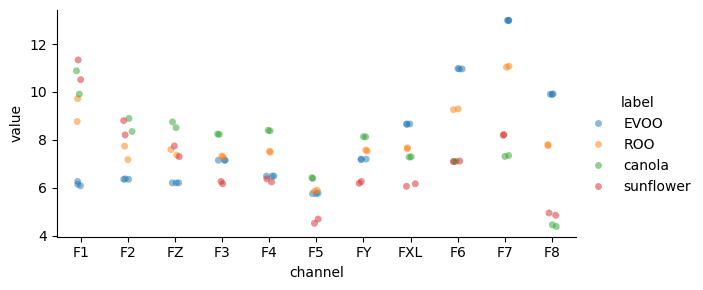

In [30]:
import seaborn
seaborn.catplot(data=tidy_log.reset_index(),
                x='channel',
                order=channel_order,
                hue='label',
                #row='excitation',
                y='value',
                alpha=0.5,
                aspect=2.0, height=3.0,
               )

In [46]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


lda = LinearDiscriminantAnalysis(n_components=2)
d = data.copy()
label_column = 'label'
data_columns = list(set(d.columns) - set([label_column]))
#data_columns = [ 'F6', 'F2' ]
data_columns = [ 'F7', 'FZ' ]
X_train = data[data_columns]
Y_train = data[label_column]

est = KNeighborsClassifier(1)
est.fit(X_train, Y_train)
est.predict_proba(X_train)

#lda.fit(X_train, Y_train)
#lda.predict_proba(X_train)


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [48]:
X_train

channel,F7,FZ
filename,,
EVOO-channels-907.npy,8096.0,74.0
EVOO-channels-970.npy,8101.0,74.0
EVOO-channels-935.npy,8133.0,74.0
ROO-channels-1239.npy,2155.0,194.0
ROO-channels-1276.npy,2097.0,165.0
canola-channels-1144.npy,159.0,431.0
canola-channels-1178.npy,163.0,365.0
sunflower-channels-1051.npy,300.0,215.0
sunflower-channels-1083.npy,292.0,158.0


In [47]:
m = d.copy().reset_index()
m = pandas.merge(m, pandas.DataFrame(lda.transform(X_train), columns=['lda_1', 'lda_2']), right_index=True, left_index=True)
m = m.sort_values('label')
m

NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Axes: xlabel='lda_1', ylabel='lda_2'>

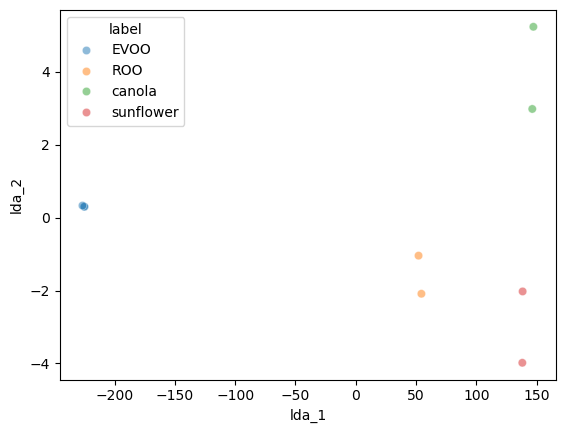

In [45]:
seaborn.scatterplot(m, x='lda_1', y='lda_2', hue='label', alpha=0.5)

In [40]:
loadings_df = pandas.DataFrame(
    lda.scalings_,
    index=data_columns,
    columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])]
)
print(loadings_df)

          LD1       LD2       LD3
F4  -0.267932 -0.359500  0.212654
F6   0.134599 -0.006807  0.031311
FXL  0.007781  0.593944 -0.753840
F5   0.357693  1.172450 -0.929405
F8   0.069302  0.014336 -0.007705
F7   0.043968 -0.036412  0.026710
F3  -0.023806 -0.384016  0.347487
F1   0.000112  0.002123 -0.001319
F2   0.005794  0.001356  0.006465
FZ   0.029088 -0.017377  0.044655
FY  -0.968748 -0.616545 -0.098658


In [41]:
np = numpy
pd = pandas
importance = np.abs(lda.scalings_).sum(axis=1)  # Sum across discriminants
feature_importance = pd.DataFrame({
    'feature': data_columns,
    'importance': importance
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

   feature  importance
3       F5    2.459548
10      FY    1.683951
2      FXL    1.355565
0       F4    0.840086
6       F3    0.755309
1       F6    0.172717
5       F7    0.107090
4       F8    0.091343
9       FZ    0.091121
8       F2    0.013615


In [42]:
#seaborn.pairplot(data, hue='label', vars=channel_order)
